In [96]:
from cisvis.identify import identify_compound
import pandas as pd
%matplotlib inline
import os
from cisclient.client import CISClient
from cisvis.spectra import generate_similarity_plot, generate_spectra_plot, to_dataframe, generate_histogram_intensity, \
    generate_histogram_accurate_mass, generate_histogram_ri, generate_similarity_histogram

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 5]


In [97]:
# these are parameterized over papermill
cis_url = 'https://dev-api.metabolomics.us/cis'
cis_api_token = 'rDJfRW6ilG2WooOR72AaE3NqL4m23WvY6ub4FEoS'


# WRONG annotation!!! splash = 'splash10-004i-0090000200-0b8bec841b059881a095' #splash10-0udi-0313009000-bf3167aa021f374219c2'
splash = 'splash10-004i-0090000200-0b8bec841b059881a095'
library = 'soqe[M-H] | QExactive | test | negative'

In [98]:

client =  CISClient(cis_url, cis_api_token)
compound = client.get_compound(library=library,splash=splash)
members = list( map(lambda member: client.get_compound(library=library,splash=member),client.get_members(library=library,splash=splash)))

# Compound Generation report

Welcome to the compound generation overview report. The main purpose is to help you diagnose the generation of compounds as well as get a better understanding why it was generated in the first place.

In [99]:
to_dataframe([compound]).drop(['spectrum','ms_level','required_for_correction','inchi_key','splash','unique_mass'],axis=1)

,id,accurate_mass,target_type,matrix,method,retention_index,sample,name,precursor_mass
0,799851,814.562744,CONFIRMED_CONSENSUS,,soqe[M-H] | QExactive | test | negative,278.939173,unknown,unknown_814.5627_278.9392,814.562744


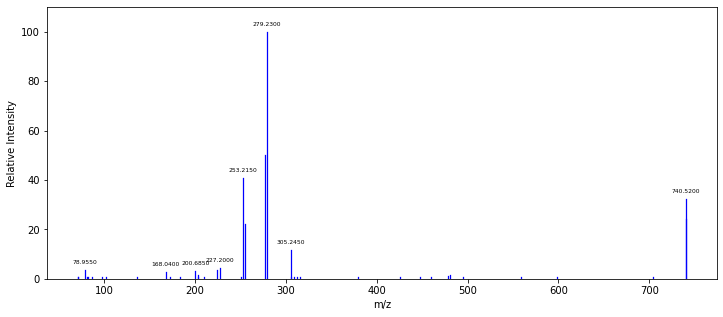

In [100]:
generate_spectra_plot(compound=compound)

This is a histogram plot of the retention index of all the members making up this compound. Please be aware that due to settings the range will never exceed these boundaeries

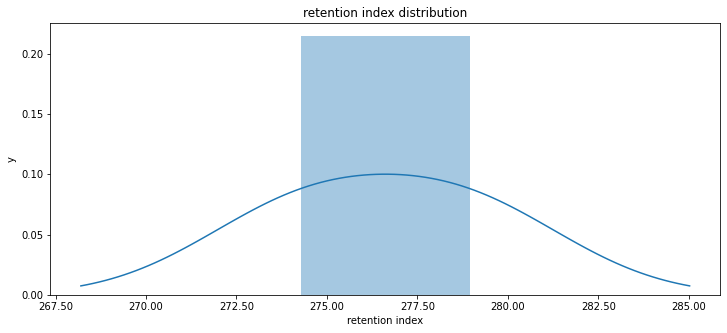

In [101]:
generate_histogram_ri(members)

This is a histogram plot of the accurate mass of all the members making up this compound. Please be aware that due to settings the range will never exceed these boundaeries

2020-06-15 09:43:04,560 [199642] WARNING  py.warnings:109: [JupyterRequire] /home/wohlgemuth/workspace/carpy/cis-vis/.venv/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)



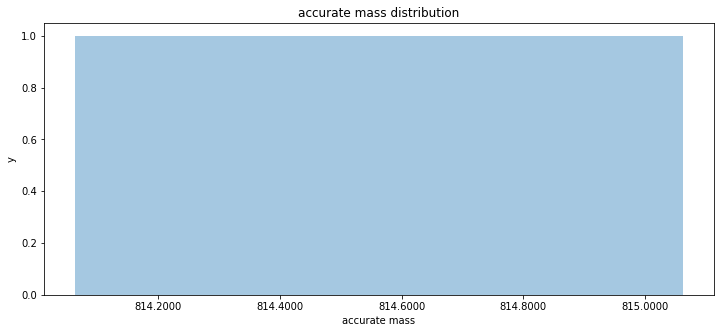

In [102]:
generate_histogram_accurate_mass(members)

This is a histogram plot of the basepeak intensity of all the members making up this compound. There are no related settings which affect this, except for
for a required min intensity setting for the Pre Cursor Mass.

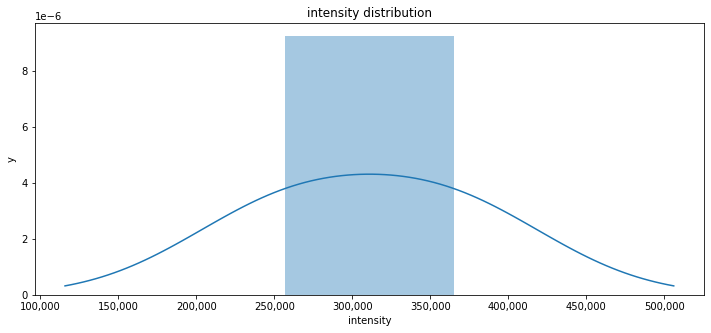

In [103]:
generate_histogram_intensity(members)

This is a tabular representation of all members of this compound, with their most important properties.

In [104]:
to_dataframe(members).drop(['spectrum','method','ms_level','required_for_correction','inchi_key','target_type','splash','unique_mass','name'],axis=1)


,id,accurate_mass,matrix,retention_index,sample,precursor_mass
0,704942,814.562744,,274.282057,NIH_Lip_Std_CSH_NEG_BR_05,814.562744
1,712100,814.562744,,278.939173,NIH_Lip_Std_CSH_NEG_PlasmaPool_0eV_03,814.562744


This plot demonstrates a similarity plot of all spectra making up this compond against each other. The purpose is mostly for diagnostics and finetuning of settings as well as discovering possible outliers.

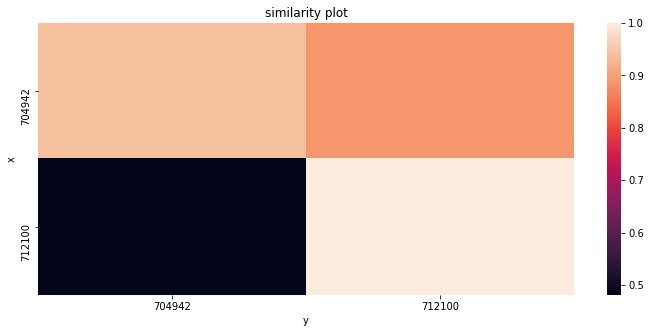

In [105]:
generate_similarity_plot(members)

This is an overview of the similarity distribution of all members for this compoaund against the consensus spectra.

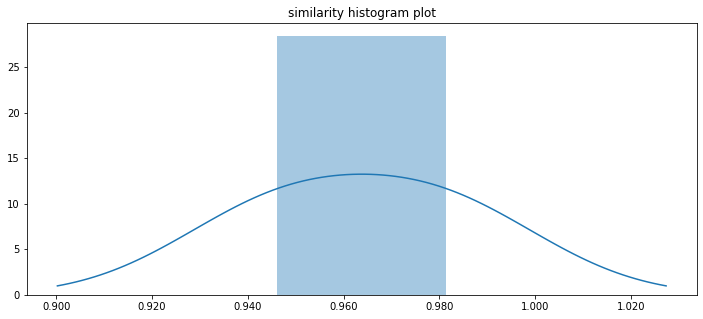

In [106]:
generate_similarity_histogram(compound,members)

Below here you can find a quick identification of potential identification of this particular compound.

In [107]:
result = identify_compound(compound)
pd.DataFrame(result).drop(['spectrum'],axis=1)

,name,id,inchi_key,splash,score
0,PC 34:3,LQB00121,QJWDAOSZZYVBJZ-BOAYSYCPSA-N,splash10-002f-0090000510-06c89ad84c2dda863be6,0.686127
1,PC 34:3,LQB00120,QJWDAOSZZYVBJZ-BOAYSYCPSA-N,splash10-004l-0090000600-2d269515c518d2649eaa,0.628653
2,Cer-EOS d49:5,LipidBlast282796,LKRCHWWGCSHFJH-PTSQNXHLSA-N,splash10-004i-0090000100-79468ac735629529098b,0.521969
3,Cer-EOS d48:5,LipidBlast310396,VKDGCGYRLYYEBR-QKJQXIRJSA-N,splash10-004i-0090000100-63f6c22c301c81aa1e17,0.521969
